<h2>Rede Neural Convolucional</h2>

In [23]:
#importação das bibliotecas utilizadas
import tensorflow 
from tensorflow import keras
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import os
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [24]:
#função para carregar o dataset

def carregar_imagens(caminho_pasta):
    imagens = []
    rotulos = []
    classes = sorted(os.listdir(caminho_pasta))
    for i, nome_classe in enumerate(classes):
        caminho_classe = os.path.join(caminho_pasta, nome_classe)
        for nome_imagem in os.listdir(caminho_classe):
            caminho_imagem = os.path.join(caminho_classe, nome_imagem)
            imagem = cv2.imread(caminho_imagem, cv2.IMREAD_GRAYSCALE)
            imagem = cv2.resize(imagem, (250, 250))  # Redimensione para 28x28 se necessário
            imagens.append(imagem)
            rotulos.append(i)  # Atribua um rótulo numérico para cada classe
    return np.array(imagens), np.array(rotulos)

# Exemplo de uso
imagens_treino, rotulos_treino = carregar_imagens('/home/raissa/demo/notebookenv/novo2/dataset-treino-processado')
imagens_teste, rotulos_teste = carregar_imagens('/home/raissa/demo/notebookenv/novo2/dataset-teste-processado')

nomes_rotulos = ['R$2,00', 'R$5,00']

/tmp/ipykernel_3194/2462170472.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 5, imagem+1, frame_on=True)


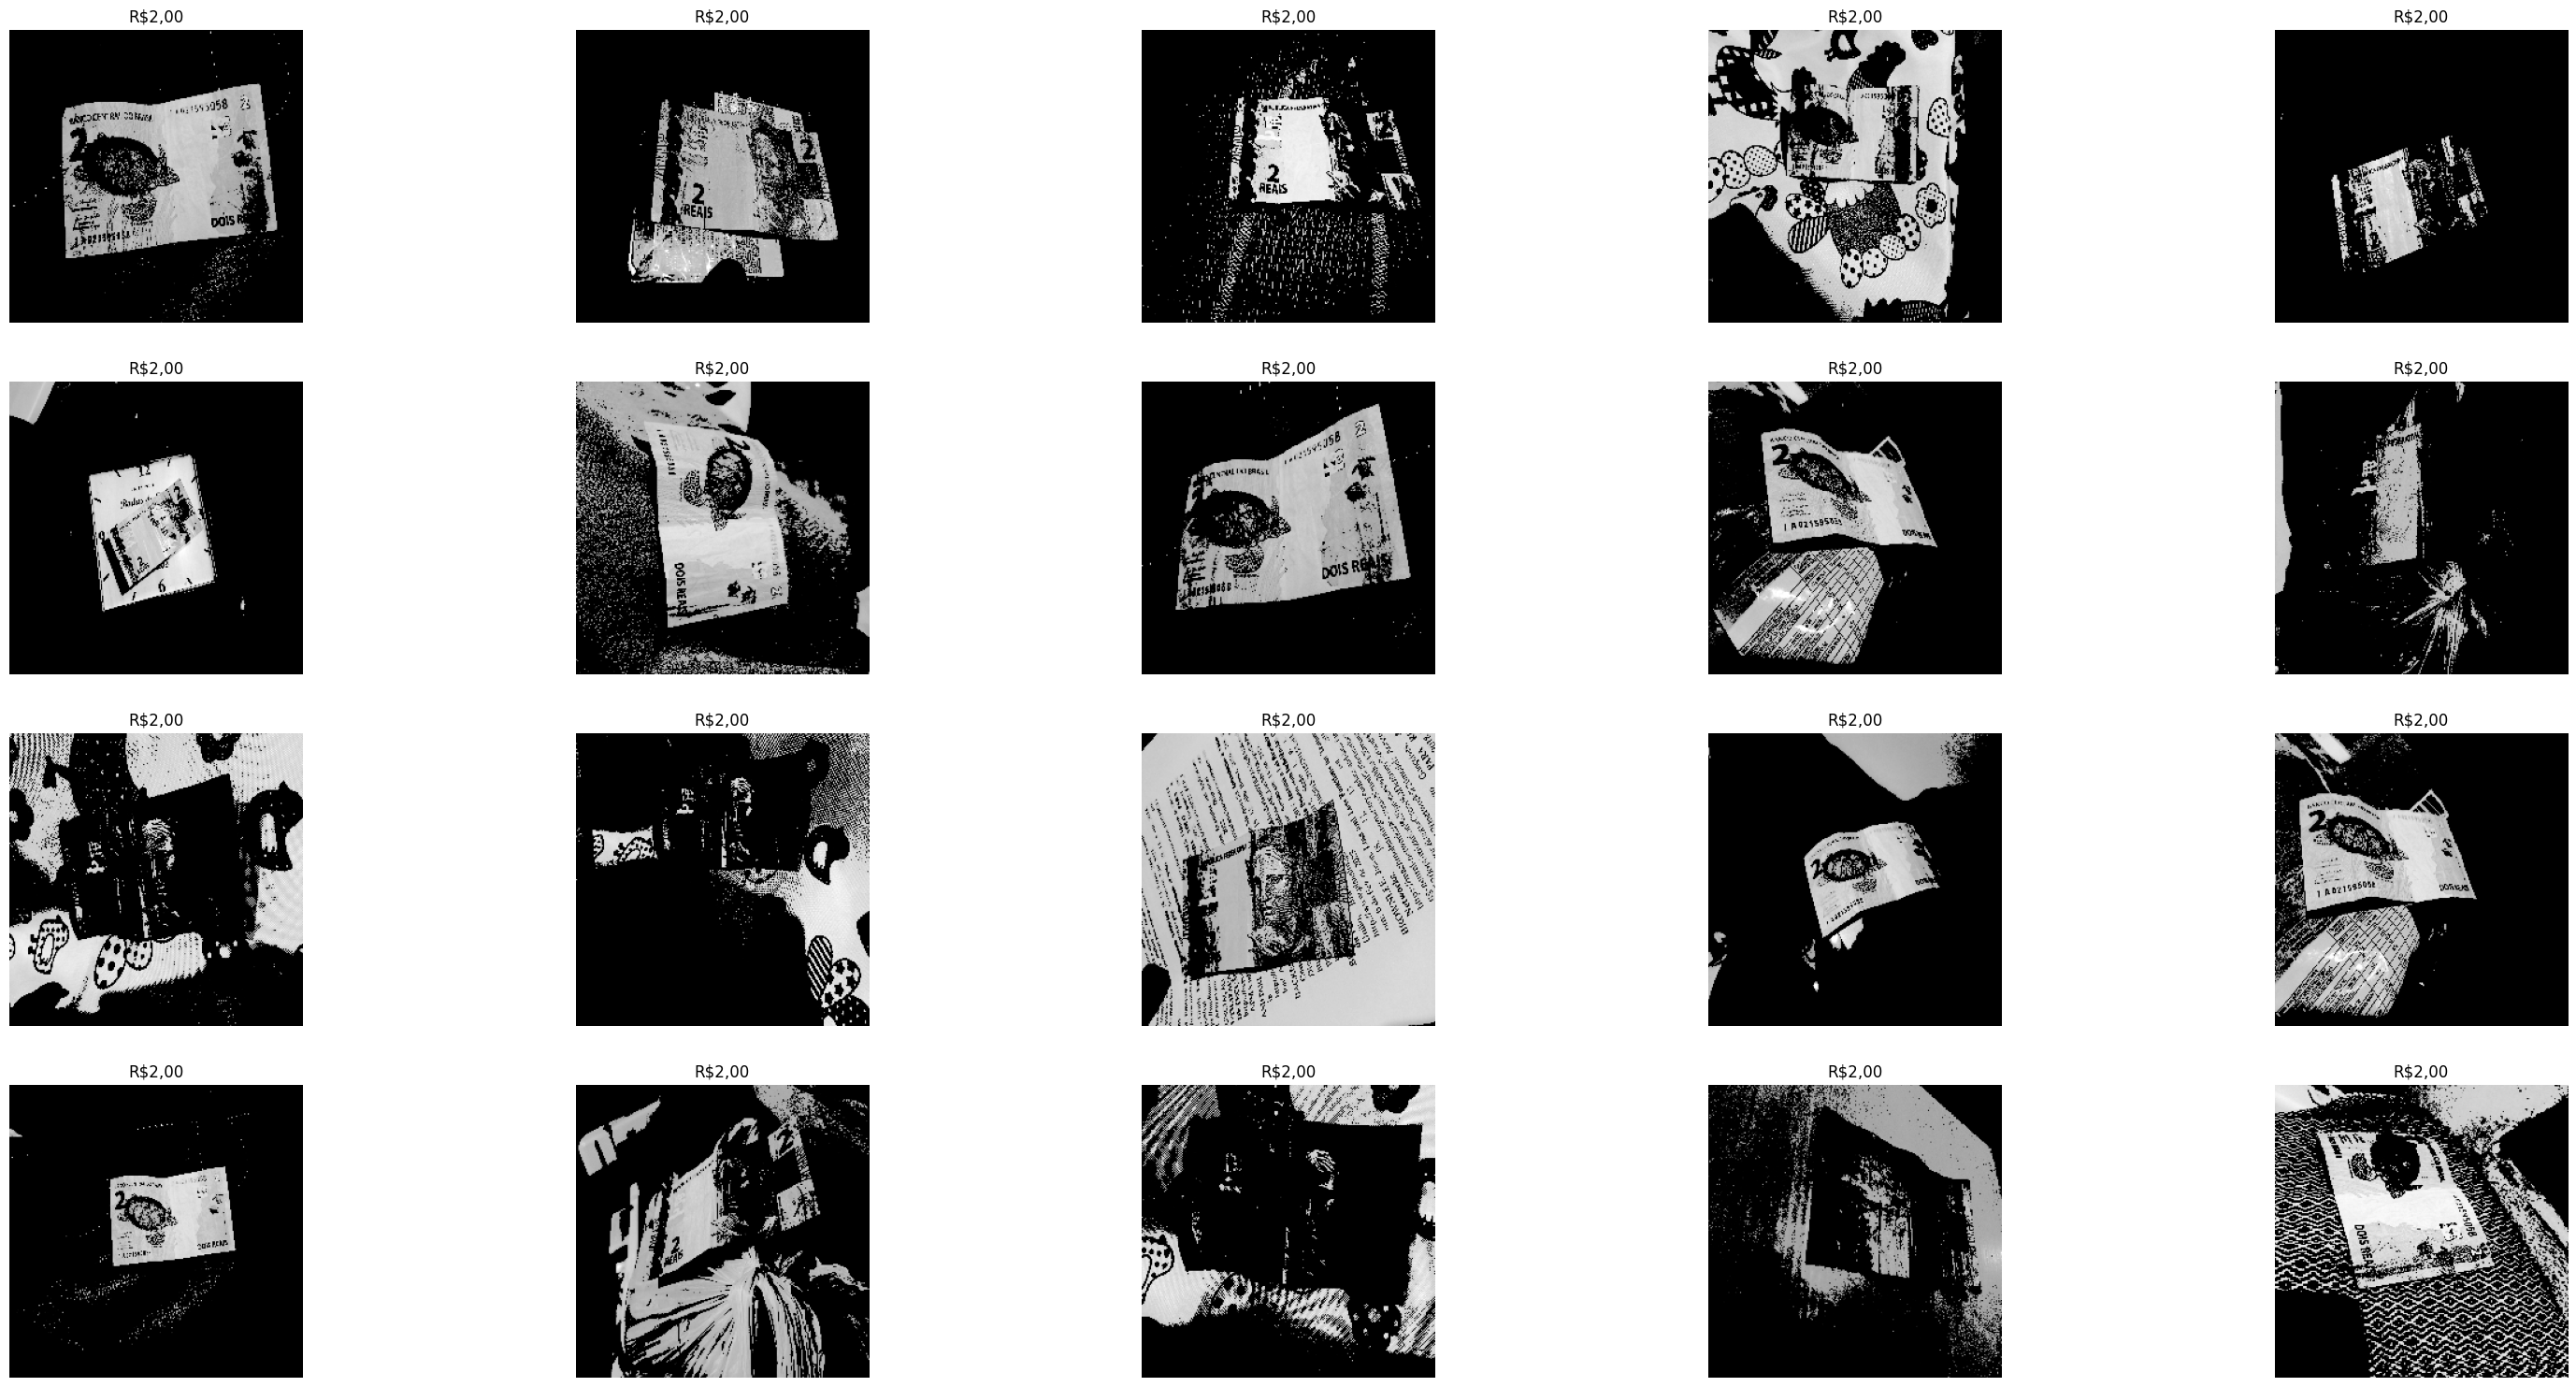

In [25]:
fig, axes = plt.subplots(figsize=(30,15))
fig.tight_layout()

for imagem in range(20):
   plt.subplot(4, 5, imagem+1, frame_on=True)
   plt.imshow(imagens_treino[imagem], cmap='gray')    
   plt.title(nomes_rotulos[rotulos_treino[imagem]])
   plt.axis('off')

(320, 250, 250, 1)


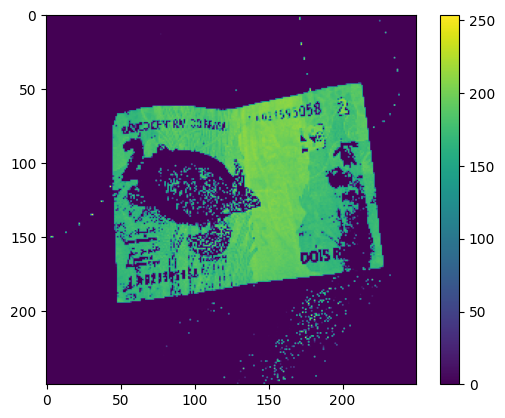

In [26]:
plt.imshow(imagens_treino[0])
plt.colorbar()

imagens_treino = imagens_treino.reshape((imagens_treino.shape[0],250,250,1))#redefino o formato para 1 vetor
imagens_teste = imagens_teste.reshape((imagens_teste.shape[0],250,250,1))#[0] é o 60000
print(imagens_treino.shape)

In [27]:
#importa o dataset de dígitos 
#dataset = keras.datasets.mnist((imagens_treino, classes_treino), (imagens_teste, classes_teste)) = dataset.load_data()

#print("imagens de Treino:" ,len(imagens_treino))
#print("imagens de Treino:" ,imagens_treino.shape) -> informações (qtd, dimensões)
#print("imagens de Teste:" ,imagens_teste.shape)
#print("classes de Treino:" ,classes_treino.shape)

#print("min: ", classes_treino.min())
#print("max: ", classes_treino.max())

#nomes_de_classificacoes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

#total_de_classificacoes=10

In [28]:
#normalização
imagens_treino = imagens_treino/255

In [29]:
#Convolução 2D => 32 = KERNELS, (3,3) =tamanho do kernel, input = (imagem 28x28 o 1 é obrigatório da biblioteca, já está em escala de cinza), função de ativação = relu(entrada negativa? converte em zero e o neuronio não é carregado)

modelo = keras.Sequential([keras.layers.Conv2D(6,(3,3), input_shape=(250,250,1), activation=tensorflow.nn.relu),
                           keras.layers.MaxPooling2D((2,2)),#trata a questão de diversos angulos da imagem
                           keras.layers.Conv2D(16,(3,3), activation=tensorflow.nn.relu),
                           keras.layers.MaxPooling2D((2,2)),#trata a questão de diversos angulos da imagem
                           keras.layers.Flatten(),#transforma a imagem 28x28 em 1D para a entrada
                           keras.layers.Dense(100, activation=tensorflow.nn.relu),#camada oculta
                           keras.layers.Dense(50, activation=tensorflow.nn.relu),#camada oculta
                           keras.layers.Dropout(0.2),#barra o overfitting
                           keras.layers.Dense(2, activation=tensorflow.nn.softmax)#na essencia dá a probabilidade de a entrada estar em uma determinada classe
                           ])
#compila
adam=keras.optimizers.Adam(lr=0.5)
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# Essa rede neural é construída usando a biblioteca Keras, que é uma API de alto nível para construção de modelos de aprendizado profundo. Vou explicar cada camada da rede e suas configurações:
#keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation=tensorflow.nn.relu): Essa é a primeira camada convolucional da rede. Ela tem 32 filtros (ou kernels) de tamanho 3x3. A input_shape é definida como (28, 28, 1), indicando que a entrada são imagens de tamanho 28x28 pixels com 1 canal (escala de cinza). A função de ativação utilizada é a ReLU (Rectified Linear Unit).
#keras.layers.MaxPooling2D((2,2)): Essa camada de pooling reduz a dimensionalidade espacial da saída da camada convolucional anterior. Ela aplica uma operação de max pooling de tamanho 2x2, reduzindo pela metade a altura e a largura da saída.
#keras.layers.Flatten(): Essa camada é responsável por transformar a saída da camada de pooling em um vetor unidimensional. Isso é necessário para conectar as camadas densas subsequentes.
#keras.layers.Dense(100, activation=tensorflow.nn.relu): Essa é uma camada densa (totalmente conectada) com 100 unidades. Cada unidade é conectada a todas as unidades da camada anterior. A função de ativação utilizada é a ReLU.
#keras.layers.Dense(50, activation=tensorflow.nn.relu): Essa é outra camada densa com 50 unidades e função de ativação ReLU.
#keras.layers.Dropout(0.2): Essa camada de dropout é usada para regularização. Ela "desliga" aleatoriamente 20% das unidades durante o treinamento, o que ajuda a evitar overfitting.
#keras.layers.Dense(10, activation=tensorflow.nn.softmax): Essa é a camada de saída da rede. Ela possui 10 unidades, correspondendo às 10 classes possíveis do conjunto de dados. A função de ativação é a softmax, que atribui probabilidades para cada classe.
#Em resumo, essa rede neural possui duas camadas convolucionais seguidas por duas camadas densas e uma camada de saída. Ela utiliza a função de ativação ReLU para as camadas convolucionais e densas, exceto para a camada de saída, onde é usada a função de ativação softmax para atribuir probabilidades às classes. A camada de dropout ajuda na regularização para evitar overfitting.



Epoch 1/10
8/8 [==============================] - 5s 551ms/step - loss: 0.7843 - accuracy: 0.5469 - val_loss: 0.8386 - val_accuracy: 0.0312
Epoch 2/10
8/8 [==============================] - 4s 523ms/step - loss: 0.6283 - accuracy: 0.6562 - val_loss: 0.9610 - val_accuracy: 0.3125
Epoch 3/10
8/8 [==============================] - 4s 530ms/step - loss: 0.4561 - accuracy: 0.7930 - val_loss: 1.1136 - val_accuracy: 0.2656
Epoch 4/10
8/8 [==============================] - 4s 537ms/step - loss: 0.3081 - accuracy: 0.8945 - val_loss: 1.0548 - val_accuracy: 0.4219
Epoch 5/10
8/8 [==============================] - 5s 627ms/step - loss: 0.1694 - accuracy: 0.9414 - val_loss: 1.3848 - val_accuracy: 0.3281
Epoch 6/10
8/8 [==============================] - 4s 519ms/step - loss: 0.0716 - accuracy: 0.9961 - val_loss: 1.4572 - val_accuracy: 0.3594
Epoch 7/10
8/8 [==============================] - 4s 530ms/step - loss: 0.0344 - accuracy: 0.9922 - val_loss: 1.5116 - val_accuracy: 0.3594
Epoch 8/10
8/8 [====

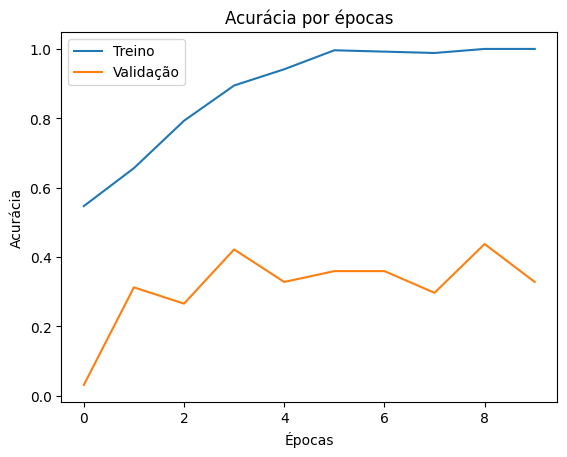

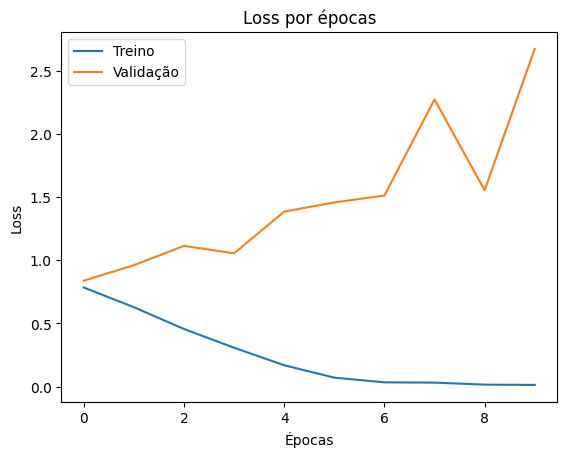

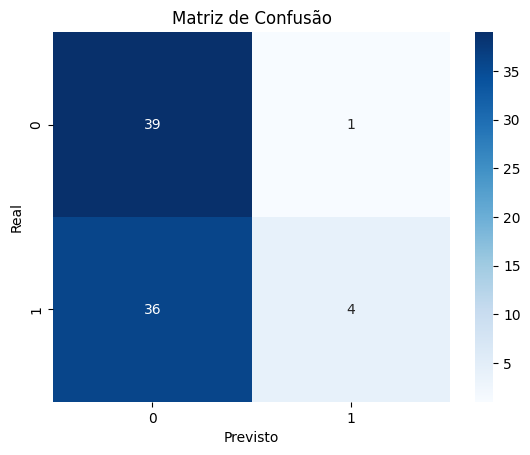

Perda do teste:  1.4997227
Acurácia do teste:  0.5375
R$2,00 0.99398106 R$2,00
R$2,00 0.90913343 R$2,00
R$2,00 0.8572649 R$2,00
R$2,00 0.98691595 R$2,00
R$2,00 0.99882406 R$2,00
R$2,00 0.99974716 R$2,00
R$2,00 0.99879336 R$2,00
R$2,00 0.9997302 R$2,00
R$2,00 0.9929526 R$2,00
R$2,00 0.99158967 R$2,00
R$2,00 0.9931916 R$2,00
R$2,00 0.9836763 R$2,00
R$2,00 0.99942935 R$2,00
R$2,00 0.60929036 R$2,00
R$2,00 0.93384093 R$2,00
R$2,00 0.99332863 R$2,00
R$2,00 0.99203575 R$2,00
R$2,00 0.9999992 R$2,00
R$2,00 0.9957988 R$2,00
R$2,00 0.9999992 R$2,00
R$2,00 0.7585154 R$2,00
R$2,00 0.95891714 R$2,00
R$2,00 0.9998739 R$2,00
R$2,00 0.99999493 R$2,00
R$2,00 0.9983529 R$2,00
R$2,00 0.9995634 R$2,00
R$2,00 0.5349608 R$2,00
R$2,00 0.5350654 R$2,00
R$2,00 0.99876547 R$2,00
R$2,00 0.8933038 R$2,00
R$2,00 0.969219 R$2,00
R$2,00 0.99959975 R$2,00
R$5,00 0.6734561 R$2,00
R$2,00 0.9900579 R$2,00
R$2,00 0.99835575 R$2,00
R$2,00 0.9972524 R$2,00
R$2,00 0.94048077 R$2,00
R$2,00 0.9996106 R$2,00
R$2,00 0.9714192 

In [30]:
hist=modelo.fit(imagens_treino, rotulos_treino, epochs=10, validation_split=0.2)

# Métricas de treinamento
loss = hist.history['loss']
accuracy = hist.history['accuracy']

# Métricas de validação
val_loss = hist.history['val_loss']
val_accuracy = hist.history['val_accuracy']

# Apresentação das métricas
print("Métricas de treinamento:")
print("Loss:", loss)
print("Accuracy:", accuracy)

print("Métricas de validação:")
print("Val Loss:", val_loss)
print("Val Accuracy:", val_accuracy)

plt.figure()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

plt.figure()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss por épocas')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['Treino', 'Validação'])

plt.figure()

model_json = modelo.to_json()
with open("model.json", "w") as json_file:
   json_file.write(model_json)

modelo.save_weights("model.h5")
print("Modelo Salvo")

json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Modelo Carregado")

loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

testes = loaded_model.predict(imagens_teste/255)

testes_classes = np.argmax(testes, axis=1)

matriz_confusao = confusion_matrix(rotulos_teste, testes_classes)

sns.heatmap(matriz_confusao, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

#perda_teste, acuracia_teste = loaded_model.evaluate(imagens_teste, rotulos_teste)

acuracia_teste = (matriz_confusao[0][0]+matriz_confusao[1][1])/(matriz_confusao[0][0]+matriz_confusao[0][1]+matriz_confusao[1][1]+matriz_confusao[1][0])
perda_teste = -np.mean(np.log(testes[np.arange(len(rotulos_teste)), rotulos_teste]))

print("Perda do teste: ", perda_teste)
print("Acurácia do teste: ", acuracia_teste)

x=0
arr=[]
for i in testes:
   #print(i)
   print(nomes_rotulos[np.argmax(i)], np.max(i), nomes_rotulos[rotulos_teste[x]])
   
   if (nomes_rotulos[np.argmax(i)] != nomes_rotulos[rotulos_teste[x]]):
      arr.append([nomes_rotulos[np.argmax(i)], nomes_rotulos[rotulos_teste[x]], imagens_teste[x]])
   x=x+1


#O código fornecido realiza as seguintes etapas:

#hist = modelo.fit(imagens_treino, rotulos_treino, epochs=10, validation_split=0.2): Treina o modelo neural utilizando os dados de treinamento (imagens_treino e rotulos_treino). A rede é treinada por 10 épocas com uma validação de 20% dos dados (validation_split=0.2). O histórico de treinamento é armazenado na variável hist.
#plt.figure(): Cria uma nova figura para o primeiro gráfico de acurácia.
#plt.plot(hist.history['accuracy']): Plota a acurácia do treinamento ao longo das épocas.
#plt.plot(hist.history['val_accuracy']): Plota a acurácia da validação ao longo das épocas.
#plt.title('Acurácia por épocas'): Define o título do gráfico de acurácia.
#plt.xlabel('Épocas'): Define o rótulo do eixo x do gráfico.
#plt.ylabel('Acurácia'): Define o rótulo do eixo y do gráfico.
#plt.legend(['Treino', 'Validação']): Adiciona uma legenda para identificar as linhas de treinamento e validação no gráfico.
#plt.figure(): Cria uma nova figura para o segundo gráfico de loss.
#plt.plot(hist.history['loss']): Plota o loss do treinamento ao longo das épocas.
#plt.plot(hist.history['val_loss']): Plota o loss da validação ao longo das épocas.
#plt.title('Loss por épocas'): Define o título do gráfico de loss.
#plt.xlabel('Épocas'): Define o rótulo do eixo x do gráfico.
#plt.ylabel('Loss'): Define o rótulo do eixo y do gráfico.
#plt.legend(['Treino', 'Validação']): Adiciona uma legenda para identificar as linhas de treinamento e validação no gráfico.
#model_json = modelo.to_json(): Converte a arquitetura do modelo em formato JSON.
#with open("model.json", "w") as json_file: json_file.write(model_json): Salva a arquitetura do modelo em um arquivo JSON chamado "model.json".
#modelo.save_weights("model.h5"): S
#alva os pesos treinados do modelo em um arquivo HDF5 chamado "model.h5".
#json_file = open("model.json", "r"): Abre o arquivo JSON contendo a arquitetura do modelo para carregá-lo posteriormente.
#loaded_model_json = json_file.read(): Lê o conteúdo do arquivo JSON.
#json_file.close(): Fecha o arquivo JSON.
#loaded_model = model_from_json(loaded_model_json): Carrega a arquitetura do modelo a partir do JSON.
#loaded_model.load_weights("model.h5"): Carrega os pesos treinados do modelo a partir do arquivo HDF5.
#loaded_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy'): Compila o modelo carregado, configurando o otimizador, função de perda e métricas

In [31]:
filepath = input("Digite o caminho do arquivo:")

imagem = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
imagem = cv2.resize(imagem, (250, 250))
imagem = np.expand_dims(imagem, axis=0)
imagem = np.expand_dims(imagem, axis=-1)
imagem = imagem / 255.0  # Normalizar os valores de pixel entre 0 e 1

# Fazer a previsão usando o modelo carregado
previsao = loaded_model.predict(imagem)
classe_predita = np.argmax(previsao)

# Imprimir a classe predita
print("Classe predita:", nomes_rotulos[classe_predita])

perda_teste, acuracia_teste = loaded_model.evaluate(imagem, rotulos_teste)
print("Perda do teste:", perda_teste)
print("Acurácia do teste:", acuracia_teste)

#A primeira linha, imagem = np.expand_dims(imagem, axis=0), adiciona uma dimensão adicional no eixo 0 da matriz da imagem. Isso é necessário porque o modelo espera receber uma lista de imagens como entrada, mesmo que você esteja fazendo previsão apenas em uma única imagem. Portanto, ao adicionar essa dimensão extra, você transforma a imagem em uma lista contendo apenas um elemento.
#A segunda linha, imagem = np.expand_dims(imagem, axis=-1), adiciona uma dimensão adicional no final da matriz da imagem. Isso é feito para representar os canais de cor da imagem. Neste caso, a imagem original é em escala de cinza, então ela possui apenas um canal. Adicionando essa dimensão extra, você está indicando que a imagem possui um canal de cor.


Digite o caminho do arquivo:/home/raissa/demo/notebookenv/novo2/dataset-teste-processado/nota5/IMG_20230813_171406.jpg
1/1 [==============================] - 0s 26ms/step
Classe predita: R$2,00


ValueError: Data cardinality is ambiguous:
  x sizes: 1
  y sizes: 80
Make sure all arrays contain the same number of samples.